In [27]:
"""
    This guide trains a neural network model to classify images of clothing.

    Uses tf.keras   ->      a high-level API to build and train models in TF.

    https://www.tensorflow.org/tutorials/keras/classification
"""
from __future__ import absolute_import, division, print_function, unicode_literals

#   TensorFlow & Keras
import tensorflow as tf
from tensorflow import keras

#   Helper Libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [ ]:
'''
    Import the Fashion MNIST dataset
                                    -> 70,000 grayscale images in 10 categories
                                    -> 28 x 28 pixels

    intended as a replacement for the classic MNIST dataset

    60,000 images   ->  train the network
    10,000 images   ->  eval accuracy
'''

#   Import & Load dataset directly from TensorFlow
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


'''
    load_data() returns ->  Tuple of 4 NumPy arrays
                                (x_train, y_train), (x_test,y_test)
                            ie
                                (train_images, train_labels), (test_images, test_labels) 
                            https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

    
    Each image is mapped to a single label.
    Since the class names are not included with the dataset,
    store them here to use later when plotting the image:

'''
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
'''
#   Explore the data
'''
#   Returns shape of the array in a tuple, ie (60,000, 28, 28)
print(train_images.shape)
'''
train_images as well as the other 3 items returned from load_data() during the previous step
are in fact of type

    numpy.ndarray


So they comply to:  https://numpy.org/devdocs/reference/generated/numpy.ndarray.shape.html#numpy.ndarray.shape
                    https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html

->  Nice Link:      https://note.nkmk.me/en/python-numpy-ndarray-ndim-shape-size/

    "The shape (= size of each dimension) of numpy.ndarray can be obtained as a tuple with attribute shape.

        Even in the case of a one-dimensional array, it is a tuple with one element instead of an integer value.
        Note that a tuple with one element has a trailing comma."


At first i got confused by tf.shape     https://www.tensorflow.org/api_docs/python/tf/shape
and went to
                                        https://www.tensorflow.org/api_docs/python/tf/Tensor#consumers
            which states that tensor.consumers() returns a list of Operations that consume this tensor.

            attempting to return the consumers list resulted in the following error:
                ---------------------------------------------------------------------------
                AttributeError                            Traceback (most recent call last)
                in 
                    32 
                    33 #type(train_images)
                ---> 34 train_images.consumers()

                AttributeError: 'numpy.ndarray' object has no attribute 'consumers'
                ---------------------------------------------------------------------------



However, a more solid approach to test object types, is to use

    type(object)    ->  Which here returns numpy.ndarray


    could just do       type(train_images)              =>      numpy.ndarray
    or even             print(type(train_images))       =>      <class 'numpy.ndarray'>
'''

#   Number of Training Images   ie  60000
print(len(train_images))
#   Number of Training Labels   ie  60000
print(len(train_labels))

#   Show numpy.ndarray structure    ie      array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)
train_labels

#   Returns shape of the array in a tuple, ie (10000, 28, 28)
print(test_images.shape)

#   Number of Testing Images    ie  10000
print(len(test_images))

#   Number of Testing Labels    ie  10000
print(len(test_labels))

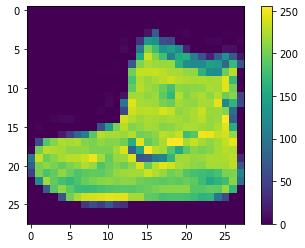

In [33]:
'''
#   Preprocess the Data
'''
#   Inspecting the first image in the training set.
#   Pixel values fall in the range of 0 to 255
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [35]:
#   We are going to scale images of both training as well as testing sets down to a scale in the range of 0 to 1
#   Pixels are values between   ->  0 and 255
#   We are effectively scaling down to  ->  0 and 255
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
#   To verify that our data in the correct format, let's display the first 25 images from both sets
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks()    #   label and item position on x-axis
    plt.yticks()    #   label and item position on y-axis
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [41]:
'''
Build the Model


Steps:
#   Building the layers
#   Compiling the model



Most layers, such as tf.keras.layers.Dense -> params that are learned during training

Here we used
        1 layer which flattens the pixels (from a 2-dimensional array => 1-dimensional)
        &
        2 learning layers

Layer Documentation can be found in:
        - Flattening Layer: Flattens the input. Does not affect the batch size.
        https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten

        - Just your regular densely-connected NN layer.
        https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
            tf.keras.layers.Dense(
                units, activation=None, use_bias=True, kernel_initializer='glorot_uniform',
                bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None,
                activity_regularizer=None, kernel_constraint=None, bias_constraint=None,
                **kwargs
            )
            Dense implements the operation: output = activation(dot(input, kernel) + bias)
            where activation is the element-wise activation function passed as the activation argument,
            kernel is a weights matrix created by the layer,
            and bias is a bias vector created by the layer (only applicable if use_bias is True).

keras.Sequential
        https://keras.io/models/sequential/
        keras.Sequential.compile
                        .fit
                        .train
                        .get_layer
                        .train_on_batch
                        ..

type(model)
tensorflow.python.keras.engine.sequential.Sequential
'''

#   Set the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),     #   Layer 1:
                                                    #       transforms image format -   No Learning
                                                    #       from a two-dimentional array (28 x 28)
                                                    #       to
                                                    #       one-dimensional array of    28 * 28 = 784 pixels
    keras.layers.Dense(128, activation='relu'),     #   Layer 2:
                                                    #       Densely Connected Neural Layers
                                                    #       128 Neurons
                                                    #       relu Activation Function
    keras.layers.Dense(10)                          #   Layer 3:
                                                    #       Returns a logits array with length of 10
                                                    #       Each node contains a score that
                                                    #       indicates the current image belongs to one of the 10 classes
])


#   Compile the Model

'''
Before training, during compilation, the model needs a few settings:

- Loss function - Measures accuracy during training.
                    We need to minimize this function - Effectively steering the model in the right direction
- Optimizer - How the model is updated
                based on the data it sees and its loss function
- Metrics - Monitor training & testing
                This example uses accuracy, the fraction of the images that are correctly classified
'''
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [44]:
'''
Train the model


Steps:
    1) Feed training data to model  -   train_images 
                                    -   train_labels

    2) Model learns to associate        [  images  ]   -   [   labels  ]

    3) Ask the model to make predictions on test data   -   test_images

    4) Verify that the predictions match the labels     -   test_labels

Remember
model is of type:   tensorflow.python.keras.engine.sequential.Sequential
'''

#   Feed Model
model.fit(train_images, train_labels, epochs=10)

#   Evaluate Accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest Accuracy:', test_acc)

'''
-----------------------------------------------------------------------------------------------
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4992 - accuracy: 0.8255
Epoch 2/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3750 - accuracy: 0.8653
Epoch 3/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3385 - accuracy: 0.8766
Epoch 4/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3152 - accuracy: 0.8846
Epoch 5/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2959 - accuracy: 0.8906
Epoch 6/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2830 - accuracy: 0.8945
Epoch 7/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2699 - accuracy: 0.8991
Epoch 8/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2576 - accuracy: 0.9044
Epoch 9/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2485 - accuracy: 0.9082
Epoch 10/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2379 - accuracy: 0.9124
10000/10000 - 0s - loss: 0.3487 - accuracy: 0.8783

Test Accuracy: 0.8783
-----------------------------------------------------------------------------------------------

During training - peak accuracy -> 0.91 ie 91%
During testing -> 87%


Turns out that the accuracy on the test dataset is a little less than that of the training set.

This gap between training accuracy & test accuracy represents overfitting.

=>
Overfitting happens when a machine learning model performs worse on new,
previously unseen input.

An overfitted model "memorizes" the noise and details in the training dataset to a point where
it negatively impacts the performance of the model on the new data.

    overfitting:
        https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting
    strategies to prevent overfitting:
        https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting

'''

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2316 - accuracy: 0.9133
Epoch 2/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2244 - accuracy: 0.9159
Epoch 3/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2182 - accuracy: 0.9187
Epoch 4/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2096 - accuracy: 0.9209
Epoch 5/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2045 - accuracy: 0.9228
Epoch 6/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1995 - accuracy: 0.9250
Epoch 7/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.1931 - accuracy: 0.9285
Epoch 8/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1889 - accuracy: 0.9288
Epoch 9/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.1848 - accuracy: 0.9307
Epoch 10/10
60

'\n-----------------------------------------------------------------------------------------------\nTrain on 60000 samples\nEpoch 1/10\n60000/60000 [==============================] - 4s 64us/sample - loss: 0.4992 - accuracy: 0.8255\nEpoch 2/10\n60000/60000 [==============================] - 3s 55us/sample - loss: 0.3750 - accuracy: 0.8653\nEpoch 3/10\n60000/60000 [==============================] - 3s 57us/sample - loss: 0.3385 - accuracy: 0.8766\nEpoch 4/10\n60000/60000 [==============================] - 4s 59us/sample - loss: 0.3152 - accuracy: 0.8846\nEpoch 5/10\n60000/60000 [==============================] - 3s 56us/sample - loss: 0.2959 - accuracy: 0.8906\nEpoch 6/10\n60000/60000 [==============================] - 3s 57us/sample - loss: 0.2830 - accuracy: 0.8945\nEpoch 7/10\n60000/60000 [==============================] - 3s 54us/sample - loss: 0.2699 - accuracy: 0.8991\nEpoch 8/10\n60000/60000 [==============================] - 3s 58us/sample - loss: 0.2576 - accuracy: 0.9044\nEpoc

[4.1863575e-11 3.5028733e-11 3.9013325e-15 2.2995087e-17 8.3599377e-11
 6.1338292e-06 5.7371097e-11 1.9842522e-04 2.2990771e-11 9.9979550e-01] 

1st Prediction - Category: 9 the actual Category - Label: 9


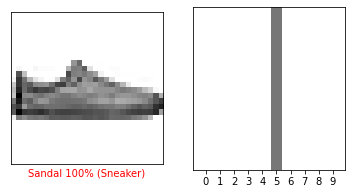

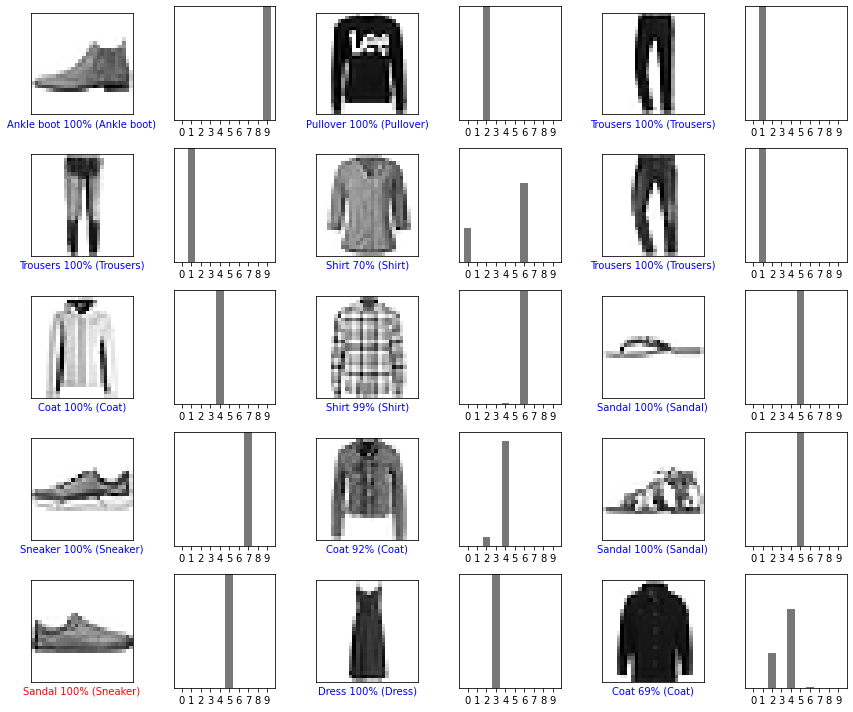

In [58]:
'''
Make Predictions


The model's linear outputs => logits.
Logits:         https://developers.google.com/machine-learning/glossary#logits
    The vector of raw (non-normalized) predictions that a classification model generates,
    which is ordinarily then passed to a normalization function.
    
    If the model is solving a multi-class classification problem,
    logits typically become an input to the softmax function.

    The softmax function then generates a vector of (normalized) probabilities with one value for each possible class.

    In addition, logits sometimes refer to the element-wise inverse of the sigmoid function.

'''

#   Attach a softmax layer => Convert the Logits to probabilities
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

#   Predict         ie  a label for each image in the testing set
predictions = probability_model.predict(test_images)




#   Check the 1st prediction
print(predictions[0],'\n')
'''
array([4.1863575e-11, 3.5028733e-11, 3.9013325e-15, 2.2995087e-17,
       8.3599377e-11, 6.1338292e-06, 5.7371097e-11, 1.9842522e-04,
       2.2990771e-11, 9.9979550e-01], dtype=float32)


So, our prediction is an array of 10 numbers.
These numbers represent confidence that this image belongs to each label.


If we pick the max => The label predicted
'''

print('1st Prediction - Category:', np.argmax(predictions[0]),
        'the actual Category - Label:', test_labels[0])




#   Graph Predictions, to view the full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
    #   Cast params into local vars
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]


    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                            100*np.max(predictions_array),
                                            class_names[true_label]),
                                            color=color)

def plot_value_array(i, predictions_array, true_label):
    #   Cast params into local vars
    predictions_array, true_label = predictions_array, true_label[i]


    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)



'''
#   Verify Predictions

#   Correct ->  blue
#   Incorrect   ->  red
#   Number -> % for the predicted label


#   Look at 0th Image
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

'''

#   Look at 12th Image
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

#   Plot the first X test images, their predicted labels and true labels.
#   Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
[[1.36638206e-04 1.00125544e-20 9.99632239e-01 1.82900678e-12
  2.23441632e-04 1.49841226e-22 7.61113051e-06 4.43834729e-23
  4.28886663e-15 1.10596339e-17]]
Prediction for this image:	 2 	 Pullover


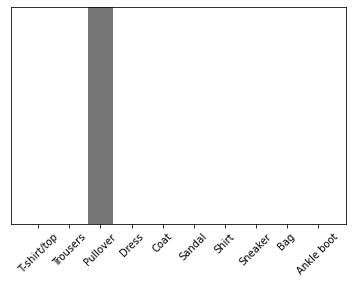

In [70]:
'''
Use the trained model to make a prediction about a single image


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once.
                https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict

Even though we want to use a single image we have to add it to a list



predict(
    x, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10,
    workers=1, use_multiprocessing=False
)
Generates output predictions for the input samples.
Computation is done in batches.
Returns:    Numpy array(s) of predictions
            ie
            a list of lists - one list for each image in the batch of data.
'''

#   Grab img from the dataset
img = test_images[1]

print(img.shape)
#   (28, 28)


#   Add an image to a batch where it's the only member
img = (np.expand_dims(img, 0))

print(img.shape)
#   (1, 28, 28)



#   Predict
predictions_single = probability_model.predict(img)

print(predictions_single)
#   [[1.36638206e-04 1.00125544e-20 9.99632239e-01 1.82900678e-12
#   2.23441632e-04 1.49841226e-22 7.61113051e-06 4.43834729e-23
#   4.28886663e-15 1.10596339e-17]]



#
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


sprediction = np.argmax(predictions_single[0])
print('Prediction for this image:\t', sprediction,'\t', class_names[sprediction])